# Linear Regression Practice

Adapted from http://www.ritchieng.com/machine-learning-linear-regression/

## 1. Reading Data using Panda

In [1]:
# conventional way to import pandas
import pandas as pd
import numpy as np
import random
# calculate MAE using scikit-learn
from sklearn import metrics
from random import randint

In [2]:
# read CSV file directly from a URL and save the results
# use .read_csv method and simply pass in the name of the files (local and through a url)
# to find out more about this method, click on the url and press shift + tab (twice)
# we set the index_col=0
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# display the first 5 rows
#data.head()
data['TV'].head()

1    230.1
2     44.5
3     17.2
4    151.5
5    180.8
Name: TV, dtype: float64

In [3]:
# display the last 5 rows
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [4]:
# check the shape of the DataFrame (rows, columns)
# there are 200 rows x 4 columns
data.shape

(200, 4)

What are the features?

- **TV**: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio**: advertising dollars spent on Radio
- **Newspaper**: advertising dollars spent on Newspaper
What is the response?

- **Sales**: sales of a single product in a given market (in thousands of items)

What else do we know?

Because the response variable is continuous, this is a **regression problem**.
There are 200 observations (represented by the rows), and each observation is a single market.


## 2. Visualizing Data

- Seaborn: Python library for statistical data visualization built on top of Matplotlib
- Anaconda users: run conda install seaborn from the command line

In [5]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

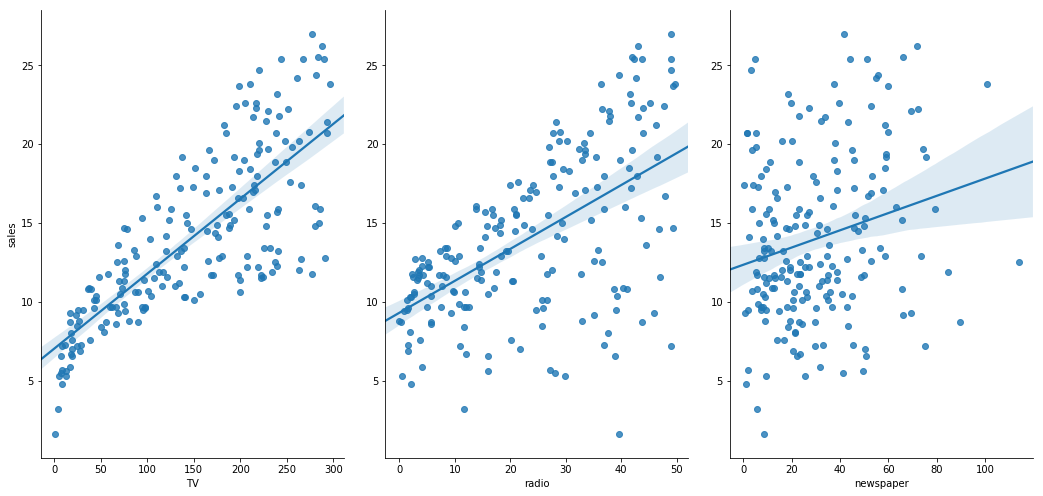

In [6]:
# visualize the relationship between the features and the response using scatterplots
# this produces pairs of scatterplot as shown
# use aspect= to control the size of the graphs
# use kind='reg' to plot linear regression on the graph
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

Linear regression
- Strong relationship between TV ads and sales
- Weak relationship between Radio ads and sales
- Very weak to no relationship between Newspaper ads and sales

## 3. Computing Linear Regression (Scikit-learn)

## Form of linear regression
$$y=\theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n$$
- $y$  is the response
- $\theta_0$  is the intercept
- In this case:
$$y=\theta_0+\theta_1\times TV+\theta_2\times Radio+\theta_3 \times Newspaper$$


scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays
However, pandas is built on top of NumPy
Thus, X can be a pandas DataFrame (matrix) and y can be a pandas Series (vector)

In [7]:
# create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the original DataFrame
X = pd.DataFrame(data, columns=feature_cols) 

# equivalent command to do this in one line using double square brackets
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame
X = data[['TV', 'radio', 'newspaper']]
# print the first 5 rows
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [8]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [9]:
# select a Series from the DataFrame
y = data['sales']

# equivalent command that works if there are no spaces in the column name
# you can select the Sales as an attribute of the DataFrame
#y = data.Sales (python 2)

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

## Splitting X and y into training and testing sets

In [10]:
# import  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


## Linear Regression

In [12]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

## Excercise 1 
# Try your own linear regression algorithm 

#tasa de aprendizaje 0. 1 - 1
alpha = 0.00001 
#print(X_train)
#print (y_train)
#constante tetha0  wc
t1=0.1
t2=0.1
t3=0.1
t0=1
mt = [t1,t2,t3,t0]

xx_train= np.array(X_train)
yy_train = np.array(y_train)
tamx = len(xx_train)
print (tamx)
xx1 = np.ones((tamx,1))
#print (x1)
xx_train = np.concatenate((xx_train, xx1), axis=1)
#print (xx_train)
yprima=np.dot(xx_train, mt)
# print (yprima)
# numero de veces
for i in range(0, 10000):
#   para cada dato 
    for j in range (0, 150):
        yprima[j]=np.dot(xx_train[j], mt)
#         print(yprima [j])
        t1=t1+ (alpha*(yy_train[j]-yprima[j]))*xx_train[j][0]
    
        t2=t2+(alpha*(yy_train[j]-yprima[j]))*xx_train[j][1]
        t3=t3+(alpha*(yy_train[j]-yprima[j]))*xx_train[j][2]
        t0=t0+(alpha*(yy_train[j]-yprima[j]))*xx_train[j][3]
        mt = [t1,t2,t3,t0]
        


# print ('resul1')
# print(np.sqrt(metrics.mean_squared_error(yy_train, yprima)))  

# print (t0)
# print (t1)
# print(t2)
# print (t3)

mt = [t1,t2,t3,t0]
# print(mt)
yprima=np.dot(xx_train, mt)
# print (yprima)
print ('resul2')
print(np.sqrt(metrics.mean_squared_error(yy_train, yprima)))

xt1 = np.ones((50,1))
xx_test =np.concatenate((X_test, xt1), axis=1)
yy_prueba=np.dot(xx_test, mt)
print (xx_train)

150
resul2
1.77755012573
[[ 289.7   42.3   51.2    1. ]
 [ 123.1   34.6   12.4    1. ]
 [  19.4   16.    22.3    1. ]
 [ 182.6   46.2   58.7    1. ]
 [ 265.6   20.     0.3    1. ]
 [ 165.6   10.    17.6    1. ]
 [ 218.5    5.4   27.4    1. ]
 [  25.    11.    29.7    1. ]
 [ 232.1    8.6    8.7    1. ]
 [  43.    25.9   20.5    1. ]
 [ 139.2   14.3   25.6    1. ]
 [ 139.3   14.5   10.2    1. ]
 [   5.4   29.9    9.4    1. ]
 [ 293.6   27.7    1.8    1. ]
 [ 281.4   39.6   55.8    1. ]
 [   8.7   48.9   75.     1. ]
 [  80.2    0.     9.2    1. ]
 [ 137.9   46.4   59.     1. ]
 [ 227.2   15.8   49.9    1. ]
 [  31.5   24.6    2.2    1. ]
 [ 262.7   28.8   15.9    1. ]
 [ 213.5   43.    33.8    1. ]
 [ 287.6   43.    71.8    1. ]
 [  11.7   36.9   45.2    1. ]
 [  17.9   37.6   21.6    1. ]
 [ 209.6   20.6   10.7    1. ]
 [  23.8   35.1   65.9    1. ]
 [  76.4    0.8   14.8    1. ]
 [ 250.9   36.5   72.3    1. ]
 [ 141.3   26.8   46.2    1. ]
 [ 187.8   21.1    9.5    1. ]
 [ 134.3    4.

## Interpreting model coefficients

In [13]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [14]:
# pair the feature names with the coefficients
# hard to remember the order, we so we python's zip function to pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

$$ y= 2.88 +0.0466 \times TV+0.179 \times radio + 0.00345 \times Newspaper $$
How do we interpret the TV coefficient (0.0466)?
For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.
Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.


## Making Predictions

In [15]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

We need an evaluation metric in order to compare our predictions with the actual values.

## 4. Model evaluation metrics for regression

we need evaluation metrics designed for comparing continuous values.
Let's create some example numeric predictions, and calculate three common evaluation metrics for regression problems:


In [16]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:
    $$\frac{1}{m}\sum_{i=1}^{m}|y^{(i)}-y'^{(i)}|$$

In [17]:
# calculate MAE by hand
print((10 + 0 + 20 + 10) / 4)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


**Mean Squared Error (MSE)** is the mean of the squared errors:
    $$\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}-y'^{(i)})^2$$
    

In [18]:
# calculate MSE by hand
import numpy as np
print((10**2 + 0**2 + 20**2 + 10**2) / 4)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:
     $$\sqrt{\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}-y'^{(i)})^2}$$
    

In [19]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt(((10**2 + 0**2 + 20**2 + 10**2) / 4)))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.2474487139
12.2474487139


Comparing these metrics:
- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units. Easier to put in context as it's the same units as our response variable

## Computing the RMSE for our Sales predictions

In [20]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_test, yy_prueba)))

1.40465142303
1.42834964172


## Feature selection

Does Newspaper "belong" in our model? In other words, does it improve the quality of our predictions?
Let's remove it from the model and check the RMSE!

In [21]:
# create a Python list of feature names
feature_cols = ['TV', 'radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.38790346994


The RMSE decreased when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

In [22]:
## Excercise 2, try nonlinear features and measure the RMSE
#print (xx_train)


# print ('jsdkljsdl')
x2_train= xx_train*1
# print (x2_train)
xx2 = np.ones((150,1))
for k in range (0,150):
    xx2[k]=np.sqrt(x2_train[k][0])
    
#     print(x2_train[k][0])


x2_train = np.concatenate((xx2,x2_train), axis=1)
#print (x2_train)
# print (x2_train)
#constante tetha0  wc
t1=0.1
t2=0.1
t3=0.1
t4=0.1
t0=1
mt2 = [t1,t2,t3,t4,t0]

print (x2_train)
alpha=0.00000001
y2prima=np.dot(x2_train, mt2)
print (y2prima)
for i in range(0, 10000):
#   para cada dato 
    for j in range (0, 150):
        y2prima[j]=np.dot(x2_train[j], mt2)
#         print(yprima [j])
        t1=t1+ (alpha*(yy_train[j]-y2prima[j]))*x2_train[j][0]
         
        t2=t2+(alpha*(yy_train[j]-y2prima[j]))*x2_train[j][1]
        t3=t3+(alpha*(yy_train[j]-y2prima[j]))*x2_train[j][2]
        t0=t0+(alpha*(yy_train[j]-y2prima[j]))*x2_train[j][3]
        t4=t4+ (alpha*(yy_train[j]-y2prima[j]))*x2_train[j][4]
        mt2 = [t1,t2,t3,t4,t0]
        

y2prima=np.dot(x2_train, mt2)
print ('resul2s')
print (y2prima)
print ('resul2d')
print (yy_train)
print ('resul2f')
print (mt2)
print ('resul2g')
# print(xx_test)
print ('resul2gw')
print(np.sqrt(metrics.mean_squared_error(yy_train, y2prima)))

# print (x2_train)
xx2 = np.ones((50,1))
for k in range (0,50):
    xx2[k]=np.sqrt(xx_test[k][0])
    
#     print(x2_train[k][0])
xx_test = np.concatenate((xx2,xx_test), axis=1)
yy_prueba=np.dot(xx_test, mt2)

print(np.sqrt(metrics.mean_squared_error(y_test, yy_prueba)))

[[  17.02057578  289.7          42.3          51.2           1.        ]
 [  11.09504394  123.1          34.6          12.4           1.        ]
 [   4.40454311   19.4          16.           22.3           1.        ]
 [  13.51295675  182.6          46.2          58.7           1.        ]
 [  16.29723903  265.6          20.            0.3           1.        ]
 [  12.86856635  165.6          10.           17.6           1.        ]
 [  14.7817455   218.5           5.4          27.4           1.        ]
 [   5.           25.           11.           29.7           1.        ]
 [  15.23482852  232.1           8.6           8.7           1.        ]
 [   6.55743852   43.           25.9          20.5           1.        ]
 [  11.79830496  139.2          14.3          25.6           1.        ]
 [  11.8025421   139.3          14.5          10.2           1.        ]
 [   2.32379001    5.4          29.9           9.4           1.        ]
 [  17.13475999  293.6          27.7           1.8 

resul2s
[ 25.11113789  12.59176563   6.11155686  21.51371606  16.00933126
  11.91006448  14.72468508   6.5130947   13.86889476   8.4353624
  12.05190701  10.52850854   5.78652732  18.41625354  24.85304489
  15.06798988   5.77086445  19.50764635  18.73357734   5.83498182
  18.58910963  19.99936497  27.18564741  10.68949976   8.74864184
  14.59774547  13.21473667   6.25665137  24.74129649  15.84247581
  13.54567937   8.96530387  16.48216913  13.39658316   6.61699293
   7.37526656  10.50825766   4.89122509  15.5561557   15.36398163
  17.45325266  19.6162359   14.70420355  10.59098674  18.0365058
  13.89410082   4.64937548  11.21369391   9.17476448  11.1800627
  16.32238142  15.1504991    5.80838254  14.75221078  14.59503284
  18.2356603   19.1146448   19.60516844  10.34931877  11.53827987
  23.65413578   2.96156175  11.86388086   5.59462346  22.80393168
  13.35890917  15.92964015   6.60458461  10.17748504  16.96329248
  15.52961305  21.50617281  23.18212949  14.59549931  10.21008109
  17.

In [30]:
# print(xx_test)

[[ 210.8   49.6   37.7    1. ]
 [ 202.5   22.3   31.6    1. ]
 [  95.7    1.4    7.4    1. ]
 [ 280.2   10.1   21.4    1. ]
 [ 253.8   21.3   30.     1. ]
 [ 283.6   42.    66.2    1. ]
 [ 163.3   31.6   52.9    1. ]
 [ 180.8   10.8   58.4    1. ]
 [  70.6   16.    40.8    1. ]
 [ 215.4   23.6   57.6    1. ]
 [ 164.5   20.9   47.4    1. ]
 [  69.2   20.5   18.3    1. ]
 [ 214.7   24.     4.     1. ]
 [ 109.8   47.8   51.4    1. ]
 [ 225.8    8.2   56.5    1. ]
 [ 125.7   36.9   79.2    1. ]
 [ 131.7   18.4   34.6    1. ]
 [ 290.7    4.1    8.5    1. ]
 [  25.6   39.     9.3    1. ]
 [ 210.7   29.5    9.3    1. ]
 [ 100.4    9.6    3.6    1. ]
 [  67.8   36.6  114.     1. ]
 [  25.1   25.7   43.3    1. ]
 [ 107.4   14.    10.9    1. ]
 [ 112.9   17.4   38.6    1. ]
 [ 188.4   18.1   25.6    1. ]
 [  43.1   26.7   35.1    1. ]
 [ 248.8   27.1   22.9    1. ]
 [ 166.8   42.     3.6    1. ]
 [ 240.1   16.7   22.9    1. ]
 [ 239.9   41.5   18.5    1. ]
 [ 234.5    3.4   84.8    1. ]
 [ 149.7